<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/3.2.2/es5/tex-mml-chtml.min.js">
</script>
<script type="text/x-mathjax-config">
 MathJax.Hub.Config({
 tex2jax: {
 inlineMath: [['$', '$'] ],
 displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
 }
 });
</script>

## キネマティクス（運動学）
　　<font color="Blue">**キネマティクス**</font>とは、外界からの力・トルクが働かない物体の運動を記述する学問である。人工衛星の姿勢を扱う上では、姿勢角と角速度ベクトルの関係を表す。はじめに、人工衛星の姿勢を数学的に表現するために必要な、方向余弦行列・オイラー角・クォータニオンなどを用いて、姿勢角に関する方程式を導こう。

1. 方向余弦行列（*DCM*: *Direction Cosign Matrix*）  
  <font color="Blue">**方向余弦行列**</font>とは、2つの座標系間の姿勢の関係を定義する$3\times3$の正方行列である。3次元空間の姿勢や回転を表すために便利な行列であり、特に宇宙工学では、慣性座標系・LVLH系・衛星ボディ座標系・コンポーネント固有座標系など、相異なる座標系間の関係を表現するために、頻繁に使用される。本項では、方向余弦行列の定義・性質を見ていく。

- 定義
  
  ![./fig/dcm.png, width="20%"]
  上図のように、基準座標系$A$と衛星ボディ座標系$B$を考えます。このとき、各座標系の単位ベクトルをそれぞれ、$a_{1}$, $a_{2}$, $a_{3}$, $b_{1}$, $b_{2}$, $b_{3}$として、各座標系間の相互関係が

$$
\left[\begin{array}{l}
b_1 \\
b_2 \\
b_3
\end{array}\right]=\left[\begin{array}{lll}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} \\
C_{31} & C_{32} & C_{33}
\end{array}\right]\left[\begin{array}{l}
a_1 \\
a_2 \\
a_3
\end{array}\right]
$$

と表されるとき、行列$C$を
$$
C=\left[\begin{array}{lll}
C_{11} & C_{12} & C_{13} \\
C_{21} & C_{22} & C_{23} \\
C_{31} & C_{32} & C_{33}
\end{array}\right]
$$
として、座標系$A$から$B$への方向余弦行列と呼ぶ。

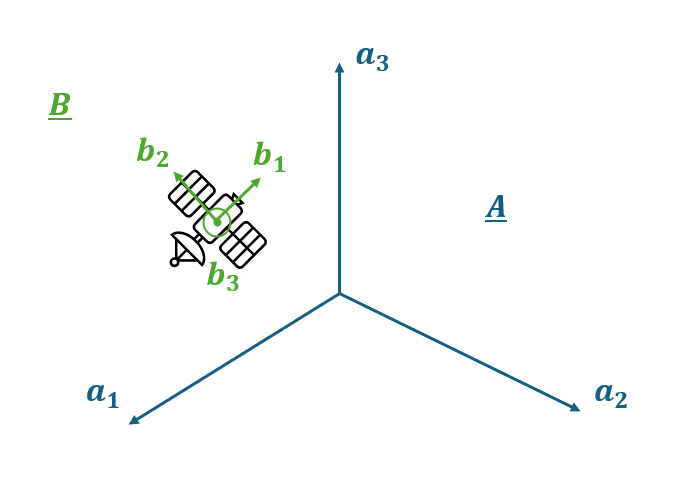

- 直交性  
  座標系$A$,$B$は、その定義から互いに直交する単位ベクトルからなる正規直交系です。したがって、行列$C$は直交行列であり、下式を満たします。
$$
C^{-1}=C^T
$$
よって、行列$C$の列ベクトル$c_{1}$, $c_{2}$, $c_{3}$について、
$$
\begin{align*}
$|c_{1}|=1, |c_{2}|=1, |c_{3}|=1 $ \text{(ノルム＝１)}\\ 
${c_{1}}^T・c_{1}=0, {c_{2}}^T・c_{2}=0, {c_{3}}^T・c_{3}=0 $ \text{(ベクトル間内積=0)}
\end{align*}
$$
が成り立ちます。なお、同様の関係式が行ベクトルについても成り立ちますが、行列$C$は対称行列であるため、計6つの拘束条件が存在することになります。したがって、行列$C$の要素数9を考慮すると、$9-6=3$の自由度を持ちます。

- 物理的な意味
　方向余弦行列が直交性を持つことの物理的な意味を考えます。

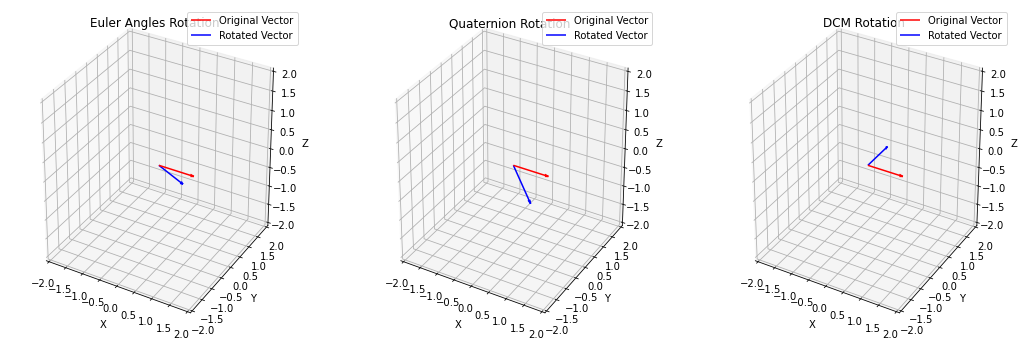

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 回転の視覚化
def plot_rotation(ax, origin, vector, rotation_matrix, title):
    # 回転ベクトルを計算
    rotated_vector = rotation_matrix @ vector

    # 描画設定
    ax.quiver(origin[0], origin[1], origin[2], vector[0], vector[1], vector[2], color='r', label='Original Vector', arrow_length_ratio=0.1)
    ax.quiver(origin[0], origin[1], origin[2], rotated_vector[0], rotated_vector[1], rotated_vector[2], color='b', label='Rotated Vector', arrow_length_ratio=0.1)

    # 軸設定
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title(title)

def main():
    # 原点と回転ベクトル
    origin = np.array([0, 0, 0])
    vector = np.array([1, 0, 0])

    # オイラー角からDCMへの変換
    def euler_to_dcm(roll, pitch, yaw):
        R_x = np.array([
            [1, 0, 0],
            [0, np.cos(roll), -np.sin(roll)],
            [0, np.sin(roll), np.cos(roll)]
        ])
        R_y = np.array([
            [np.cos(pitch), 0, np.sin(pitch)],
            [0, 1, 0],
            [-np.sin(pitch), 0, np.cos(pitch)]
        ])
        R_z = np.array([
            [np.cos(yaw), -np.sin(yaw), 0],
            [np.sin(yaw), np.cos(yaw), 0],
            [0, 0, 1]
        ])
        return R_z @ R_y @ R_x

    # オイラー角（ロール、ピッチ、ヨー）の設定
    roll = np.pi / 6   # 30度
    pitch = np.pi / 4  # 45度
    yaw = np.pi / 3    # 60度

    dcm = euler_to_dcm(roll, pitch, yaw)

    # プロット
    fig = plt.figure(figsize=(18, 6))

    # オイラー角による回転
    ax1 = fig.add_subplot(131, projection='3d')
    plot_rotation(ax1, origin, vector, dcm, 'Euler Angles Rotation')

    # クォータニオンからDCMへの変換
    def quaternion_to_dcm(q):
        w, x, y, z = q
        return np.array([
            [1 - 2 * (y**2 + z**2), 2 * (x * y - z * w), 2 * (x * z + y * w)],
            [2 * (x * y + z * w), 1 - 2 * (x**2 + z**2), 2 * (y * z - x * w)],
            [2 * (x * z - y * w), 2 * (y * z + x * w), 1 - 2 * (x**2 + y**2)]
        ])

    # クォータニオンの設定
    quaternion = [0.866, 0, 0.5, 0]  # 例: 90度回転のクォータニオン

    dcm_quat = quaternion_to_dcm(quaternion)

    # クォータニオンによる回転
    ax2 = fig.add_subplot(132, projection='3d')
    plot_rotation(ax2, origin, vector, dcm_quat, 'Quaternion Rotation')

    # DCM自体の回転
    def dcm_to_euler(dcm):
        sy = np.sqrt(dcm[0, 0]**2 + dcm[1, 0]**2)
        singular = sy < 1e-6
        if not singular:
            x = np.arctan2(dcm[2, 1], dcm[2, 2])
            y = np.arctan2(-dcm[2, 0], sy)
            z = np.arctan2(dcm[1, 0], dcm[0, 0])
        else:
            x = np.arctan2(-dcm[1, 2], dcm[1, 1])
            y = np.arctan2(-dcm[2, 0], sy)
            z = 0
        return np.array([x, y, z])

    # DCMの設定
    dcm_example = np.array([[0, -1, 0],
                            [1, 0, 0],
                            [0, 0, 1]])

    # DCMによる回転
    ax3 = fig.add_subplot(133, projection='3d')
    plot_rotation(ax3, origin, vector, dcm_example, 'DCM Rotation')

    plt.ion()
    plt.show()

if __name__ == "__main__":
    main()


In [4]:
def quaternion_to_dcm(q):
    w, x, y, z = q
    dcm = np.array([
        [1 - 2 * (y**2 + z**2), 2 * (x * y - z * w), 2 * (x * z + y * w)],
        [2 * (x * y + z * w), 1 - 2 * (x**2 + z**2), 2 * (y * z - x * w)],
        [2 * (x * z - y * w), 2 * (y * z + x * w), 1 - 2 * (x**2 + y**2)]
    ])
    return dcm

# 例: クォータニオン (w, x, y, z)
quaternion = [1/2**0.5, 0, 1/2**0.5, 0]
dcm = quaternion_to_dcm(quaternion)
print(f"DCM:\n{dcm}")

DCM:
[[ 2.22044605e-16  0.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  0.00000000e+00  2.22044605e-16]]
